# ImageNet Dataset과 ILSVRC 경진대회

## ImageNet Dataset
- https://www.image-net.org/
- 웹상에서 수집한 약 1500만장의 라벨링된 고해상도 이미지로 약 22,000개 카테고리로 구성된 대규모 Image 데이터셋.

## ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 대회
- https://image-net.org/challenges/LSVRC/
- 2010년 부터 2017년 까지 진행된 컴퓨터 비전 경진대회.
- ImageNet의 이미지중 **1000개 카테고리 약 120만장의 학습용이미지, 5만장의 검증 이미지, 15만장의 테스트 이미지를** 이용해 대회를 진행한다.
- **2012년** CNN기반 딥러닝 알고리즘인 **AlexNet**이 2위와 큰 차이로 우승하며 이후 딥러닝 알고리즘이 대세가 되었다. 특히 2015년 우승한 ResNet은 0.036의 에러율을 보이며 우승했는데 이는 사람이 에러율이라 알려진 0.05 보다 높은 정확도였다.
- ILSVRC에서 우승하거나 좋은 성적을 올린 모델들이 컴퓨터 비전분야 발전에 큰 역할을 해왔으며 이후 다양한 Computer Vision 분야의 네트워크 모델의 백본(backbone)으로 사용되고 있다.

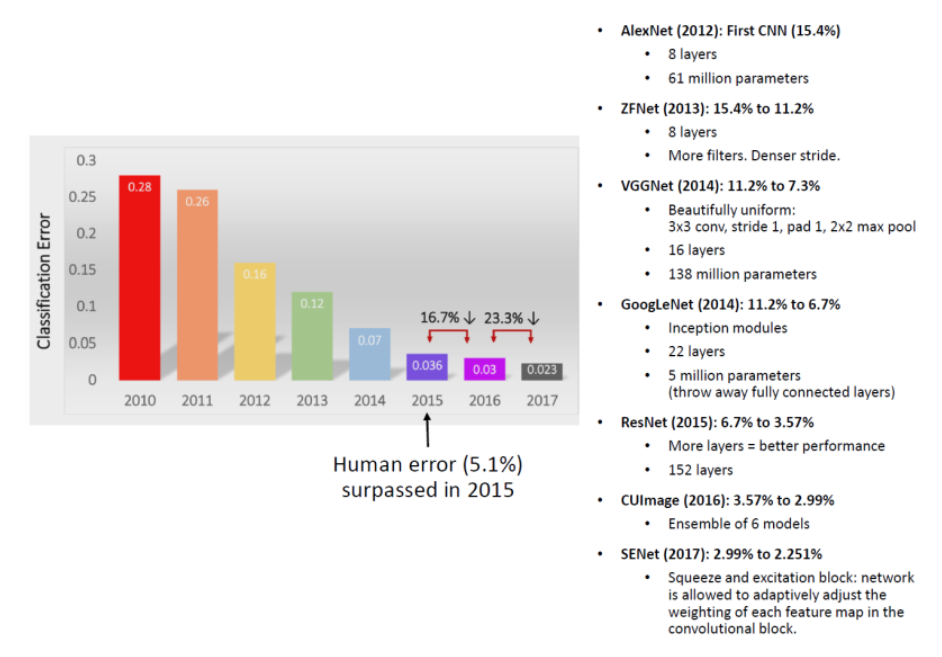

# 주요 CNN 모델
- CNN 기반의 주요 모델들과 그 모델에 쓰인 주요 기법들을 알아본다.

    - VGGNet
    - ResNet

##  VGGNet(VGG16)
- VGG(Visual Geometry Group)

- ImageNet ILSVRC Challenge 2014에서 2등한 모델로 Simonyan and Zisserman(Oxford Univ.)에 의해 제안
    - VGGNet이 준우승을 하긴 했지만, 구조의 간결함과 사용의 편이성으로 인해 1등한 GoogLeNet보다 더 각광받았다
    - 단순한 구조이지만 좋은 성능을 보여 이후 다양한 Computer Vision Network 모델에서 Feature 추출을 위한 Backbone Network으로 많이 사용되었다.

- 네트워크 깊이가 어떤 영향을 주는 지 연구 하기 위해 설계된 네트워크로 모든 Layer에서 동일한 kernel size(3 x 3)의 필터를 사용했으며 filter(kernel)의 개수를 늘려가며 레이어를 쌓는 방식으로 구성됨.
    - 11 layer, 13 layer, 16 layer, 19 layer 의 네트워크를 테스트함.
        - 이 중 VGG-16 모델이 2014년도 ILSVRC 대회에 참가한 모델임.
    - 19 layer의 성능이 16 layer보다 크게 나아지지 않았고 21개 Layer를 쌓은 모델은 성능이 떨어졌다.

- Filter의 수를 64, 128, 256, 512 두 배씩 키움.

- 모든 layer들에 **$3 \times 3$ filter, stride=1, same padding의 Convolution Layer**와 **$2\times 2$, stride=2의 MaxPooling** 사용
    - 이전 AlexNet이 5 X 5 필터를 사용했는데 VGG16은 3 X 3 필터의 Layer를 두개 연속으로 연결했다.
        - **3 x 3 필터 두개를 쌓는 것이 5 x 5  하나를 사용하는 보다 더 적은 파라미터를 사용하며 성능이 더 좋았다.**
    - Feature map의 사이즈를 convolution layer가 아닌 Max Pooling 을 사용해 줄여줌.
   

- VGG16의 단점은 마지막에 분류를 위해 Fully Connected Layer 3개를 붙여 파라미터 수가 너무 많아 졌다. 약 1억4천만 개의 parameter(가중치)중 1억 2천만개 정도가 Fully Connected Layer의 파라미터 임.

- **구조**
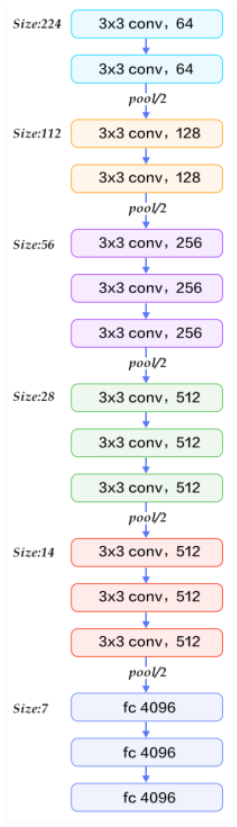

## ResNet (Residual Networks)
- 2015년 마이크로소프트 리서치 팀에서 제안한 신경망구조로 잔차모듈(Residual module) 과 skip connection 이라는 구조가 사용됨
- **Skip connection(Shortcut connection)기법을 이용해 Layer수를 획기적으로 늘린 CNN 모델**로 ILSVRC 2015년 대회에서 우승을 차지함.

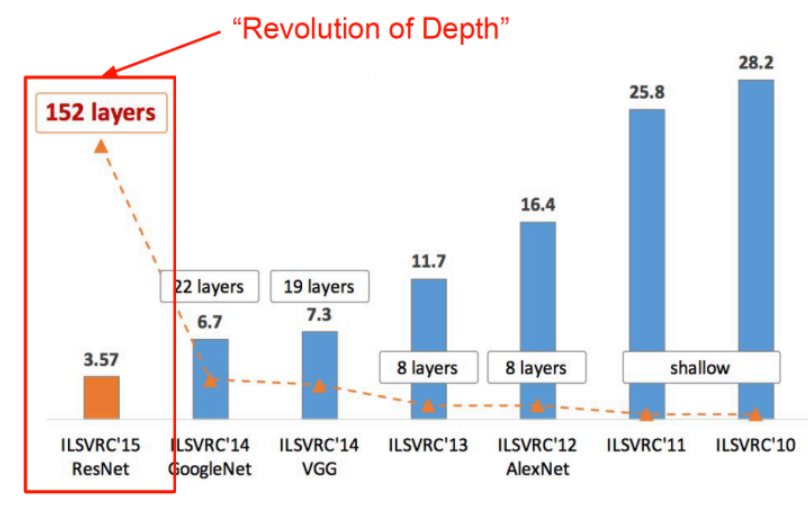

- "레이어를 깊게 쌓으면 성능이 더 좋아 지지 않을까?" 라는 가설에서 시작
    - Layer를 깊게 쌓으면 비선형성이 더 많이 추가 되된다. 그럼 더 많은 특성들을 추출 할 수 있기 때문에 네트워크 모델의 성능이 더 좋아 질 수 있다.
    - 실제는 Test 셋 뿐만 아니라 Train Set에서도 성능이 나쁘게 나옴.
- Train set에서도 성능이 나쁘게 나온 것은 최적화 문제로 보고, 레이어를 깊게 쌓으면 최적화 하기가 어렵다고 생각함. 
    - Layer를 깊게 쌓으면 weight들이 더 많이 생기므로 최적화가 어려워진다. 
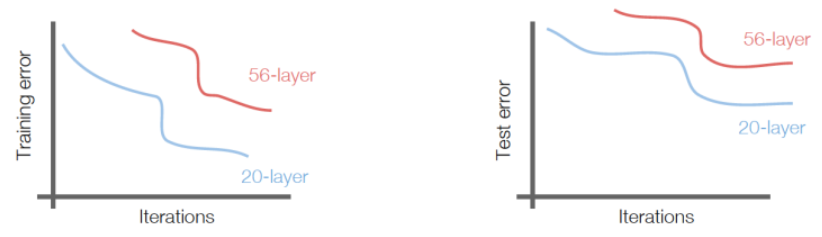

### Idea
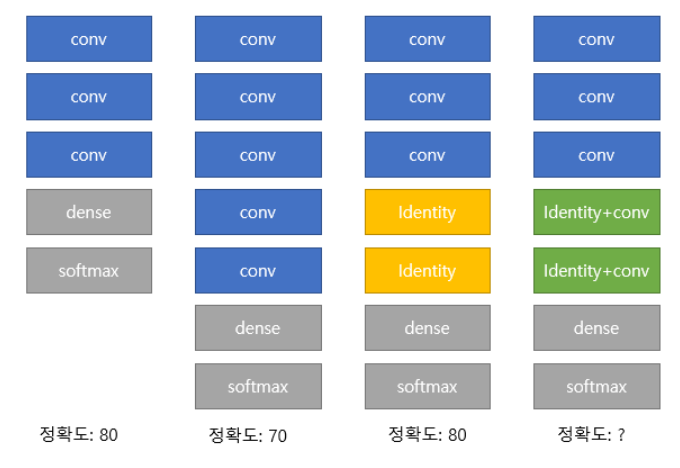

- 입력값을 그대로 출력하는 identity block 을 사용하면 성능이 떨어지지는 않는다.
- 그럼 Convloution block을 identity block으로 만들면 최소한 성능은 떨어지지 않고 깊은 Layer를 쌓을 수 있지 않을까?

### Solution
- Residual block
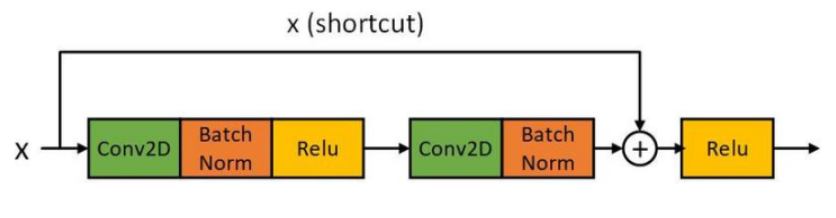

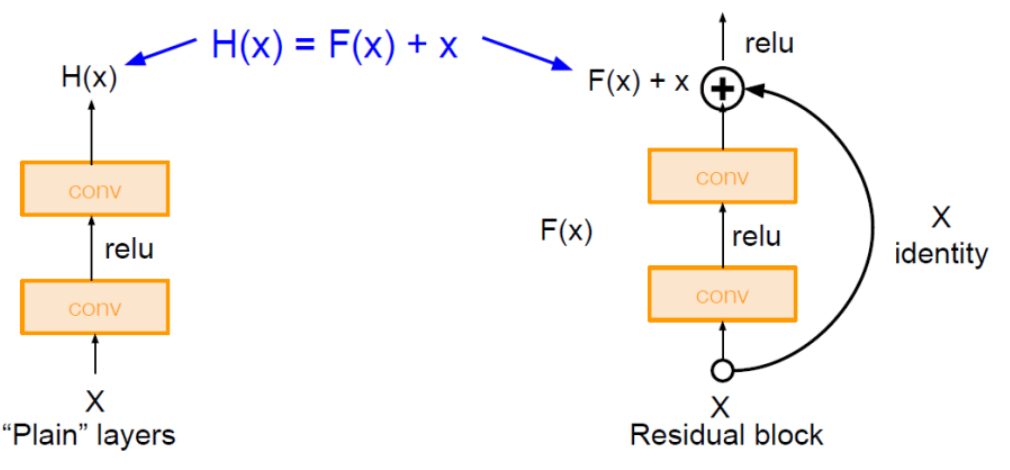

- 기존 Layer들의 목표는 입력값인 X를 출력값인 Y로 최적의 매핑할 수 있는 함수 H(X)를 찾는 것이다. 그래서 H(X) – Y 가 최소값이 되는 방향으로 학습을 진행하면서 H(X)를 찾음. 그런데 레이어가 깊어지면서 최적화에 어려움으로 성능이 떨어지는 문제가 발생

- ResNet은 layer를 통과해서 나온 값이 **입력값과 동일하게 만드는 것을 목표로 하는 Identity block을** 구성한다.
- Identity block은 입력값 X를 레이어를 통과시켜서 나온 Y에 입력값 X를 더해서 합치도록 구성한다.

$$\large H(x) = F(x) + x\\x: input,\;H(x): output,\;F(x): layer통과값$$ 
 
 
- 목표는 $H(x)$(레이어통과한 값) 가 input인 x와 동일한 것이므로 F(x)를 0으로 만들기 위해 학습을 한다. 
- $F(x)$는 **잔차(Residual)**가 된다. 그리고 잔차인 $F(x)$가 0이 되도록 학습하는 방식이므로 Residual Learning이라고 한다.
- 입력인 x를 직접 전달하는 것을 **shortcut connection** 또는 **identity mapping** 또는 **skip connection** 이라고 한다.
    - 이 shortcut은 파라미터 없이 단순히 값을 더하는 구조이므로 연산량에 크게 영향이 없다.
- 그리고 Residual을 찾는 레이어를 **Residual Block, Identity Block** 이라고 한다.      

### 성능향상
- $H(x) = F(x) + x$ 을 $x$에 대해 미분하면 최소한 1이므로 Gradient Vanishing 문제를 해결함.
    - 전달 된 gradient가 앞쪽(botton) layer에 그대로 전달되 gradient가 소실되는 문제가 해결된다.
    - x + y 를 y에 대해 미분하면 1
- 잔차학습이라고 하지만 Residual block 은 Convolution Layer와 Activation Layer로 구성되어 있기 때문에 이 Layer를 통과한 Input으로 부터 Feature map을 추출하는 과정은 진행되며 레이어가 깊으므로 다양한 더욱 풍부한 특성들을 추출하게 되어 성능이 향상된다.
  

### ResNet 구조
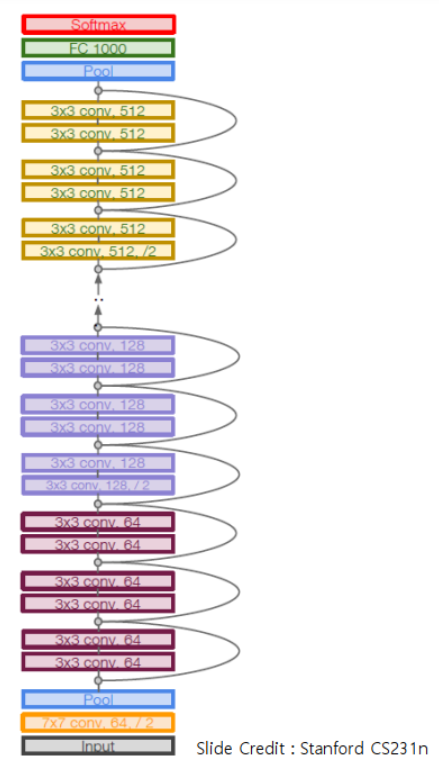

<br>
<br>

- Residual block들을 쌓는 구조
    - 일반 Convolution Layer(backbone)을 먼저 쌓고 Identity(Residual) block들을 계속 쌓는다.
- 모든 Identity block은 두개의 3X3 conv layer로 구성됨.
- 일정 레이어 수별로 filter의 개수를 두배로 증가시키며 stride를 2로 하여 downsampling 함. (Pooling Layer는 Identity block의 시작과 마지막에만 적용)

### 결과

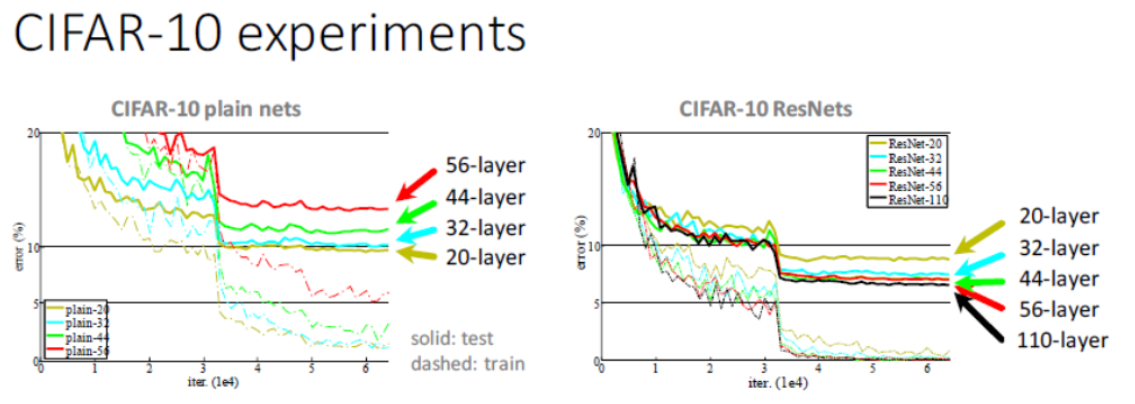